### Q1.3.1 Predicting quality using chlorides using a model using gradient descent 
This is using scikitlearn's SGDRegressor (Stochastic  GD)


In [63]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd


df = pd.read_csv("WineQT.csv")
seed = 13
eta = 0.01
max = 1000 # For iterations


X = df[["chlorides"]].values
y = df["quality"].values

# Standardize feature 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train linear regression with SGD
sgd_reg = SGDRegressor(max_iter=max, tol=1e-3, eta0=eta, random_state=seed)
#sgd_reg.fit(X_scaled, y)
sgd_reg.fit(X, y)

print("SGD Chlorides Regression coefficients:")
print("Coefficient:", sgd_reg.coef_[0])
print("Intercept:", sgd_reg.intercept_[0])

SGD Chlorides Regression coefficients:
Coefficient: 0.4171198597623497
Intercept: 5.620951792493862


###  Q1.3.2 Predicting quality based on only alcohol using the same model

In [64]:
# Feature and target
X = df[["alcohol"]].values
y = df["quality"].values

# Scale
X_scaled = scaler.fit_transform(X)

# Train model
#sgd_reg.fit(X_scaled, y)
sgd_reg.fit(X, y)

print("SGD Alcohol Regression coefficients:")
print("Coefficient:", sgd_reg.coef_[0])
print("Intercept:", sgd_reg.intercept_[0])

SGD Alcohol Regression coefficients:
Coefficient: 0.48574636356147094
Intercept: 0.44618442576134143


## Q.1.3.3 Report the regression coefficient and intercept and compare both models
Chlorides predicting quality has a coefficient of -0.101 and intercept of 5.663, meaning that it has a small negative effect on quality
Alcohol predicting quality has a coefficient of 0.392 and intercept of 5.665. Meaning it has a slightly bigger positive effect and stronger predictor than chlorides



## Q1.3.4 Plot the regression line against the data points. Does the regression line fit the data well for chlorides or alcohol? Why or why not?

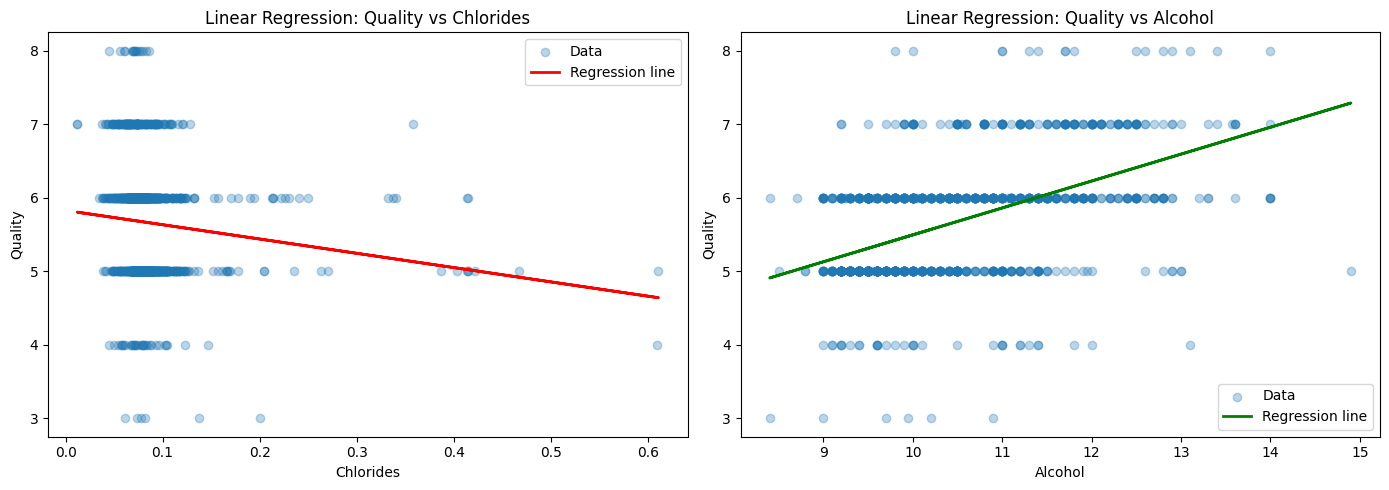

In [65]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import numpy as np

# Chlorides
X_chl = df[["chlorides"]].values
y = df["quality"].values

# Scale chlorides
scaler_chl = StandardScaler()
X_chl_scaled = scaler_chl.fit_transform(X_chl)

# Train model
sgd_chl = SGDRegressor(max_iter=max, tol=1e-3, eta0=eta, random_state=seed)
sgd_chl.fit(X_chl_scaled, y)

# Predictions
y_chl_pred = sgd_chl.predict(X_chl_scaled)

# Alcohol
X_alc = df[["alcohol"]].values

# Scale alcohol
scaler_alc = StandardScaler()
X_alc_scaled = scaler_alc.fit_transform(X_alc)

# Train model
sgd_alc = SGDRegressor(max_iter=max, tol=1e-3, eta0=eta, random_state=seed)
sgd_alc.fit(X_alc_scaled, y)

# Predictions
y_alc_pred = sgd_alc.predict(X_alc_scaled)

plt.figure(figsize=(14,5))
# Chlorides plot
plt.subplot(1,2,1)
plt.scatter(X_chl, y, alpha=0.3, label="Data")
plt.plot(X_chl, y_chl_pred, color="red", linewidth=2, label="Regression line")
plt.xlabel("Chlorides")
plt.ylabel("Quality")
plt.title("Linear Regression: Quality vs Chlorides")
plt.legend()

# Alcohol plot
plt.subplot(1,2,2)
plt.scatter(X_alc, y, alpha=0.3, label="Data")
plt.plot(X_alc, y_alc_pred, color="green", linewidth=2, label="Regression line")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Linear Regression: Quality vs Alcohol")
plt.legend()

plt.tight_layout()
plt.show()


Chlorides line does not match the datapoints, whilst alcohol's line has a clear positive trend that goes through and follows the general pattern of the data, indicating alcohol is a stronger and more consistent predictor of wine quality compared to chlorides.